In [76]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_diabetes

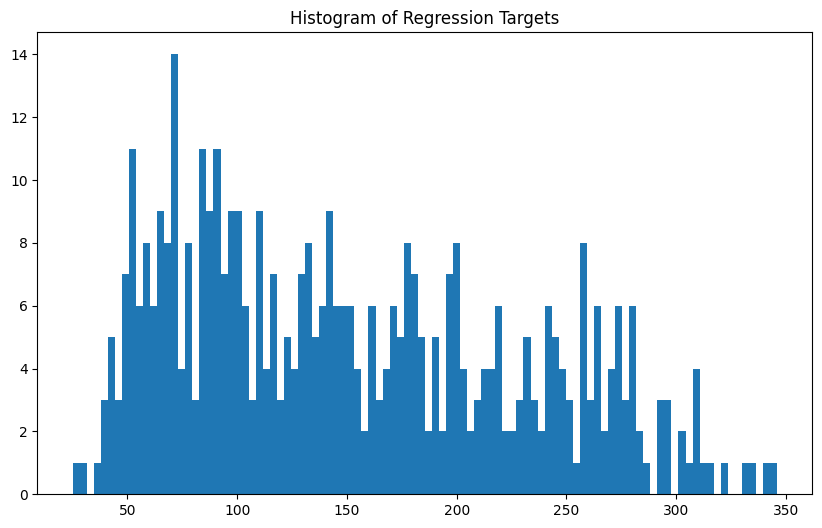

In [80]:
data = load_diabetes()
X,y = data['data'], data['target']

plt_figsize = (10,6)
plt.figure(figsize=plt_figsize)
plt.hist(y, bins=100)
plt.title('Histogram of Regression Targets')
plt.show()

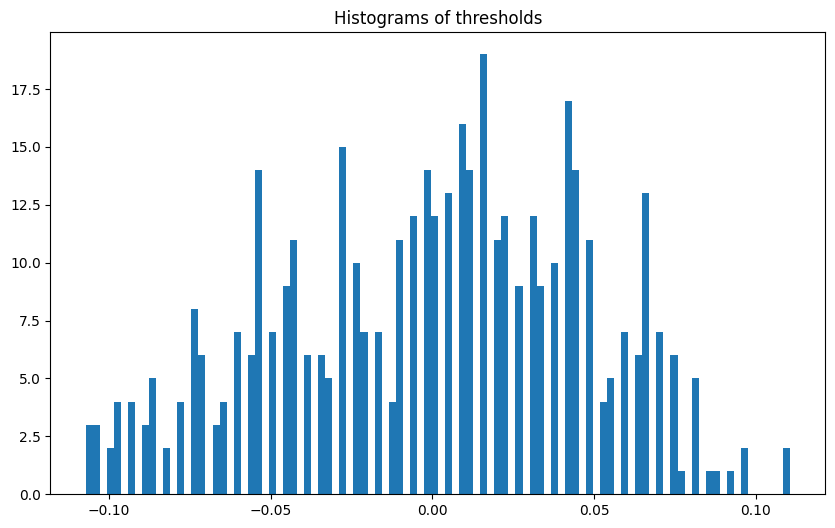

In [75]:
thresh = np.unique(X[:,0])


plt_figsize = (10,6)
plt.figure(figsize=plt_figsize)
plt.hist(X[:,0].reshape(-1), bins=100)
plt.title('Histograms of thresholds')
plt.show()

/var/folders/1j/chhd52wn0z97rq9skbstg0_00000gn/T/ipykernel_3156/3676677941.py:16: RuntimeWarning: invalid value encountered in divide
  right_samples_mean = np.where(n_samples_right == 0, 0, right_samples_sum / n_samples_right)


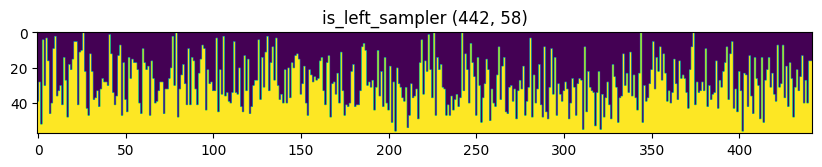

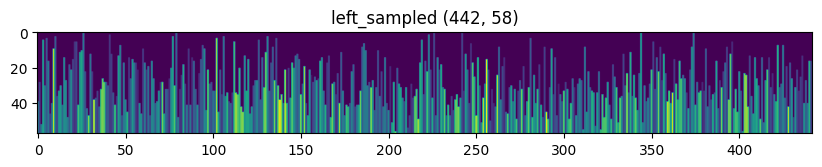

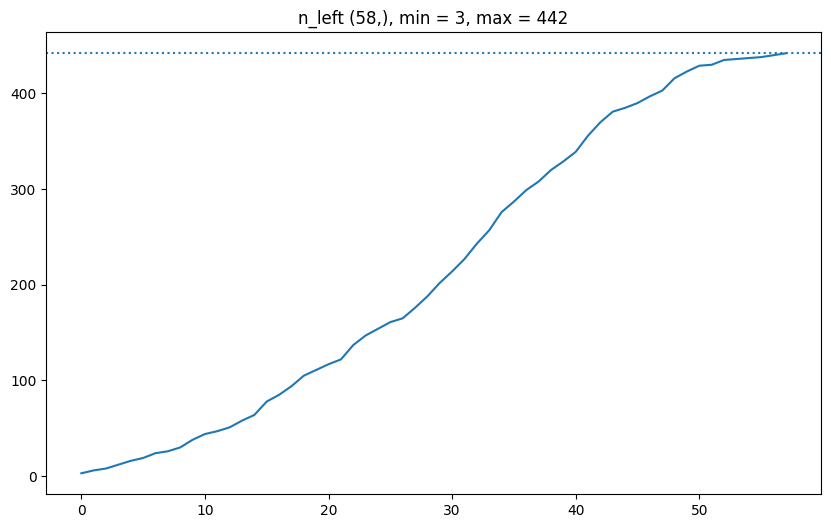

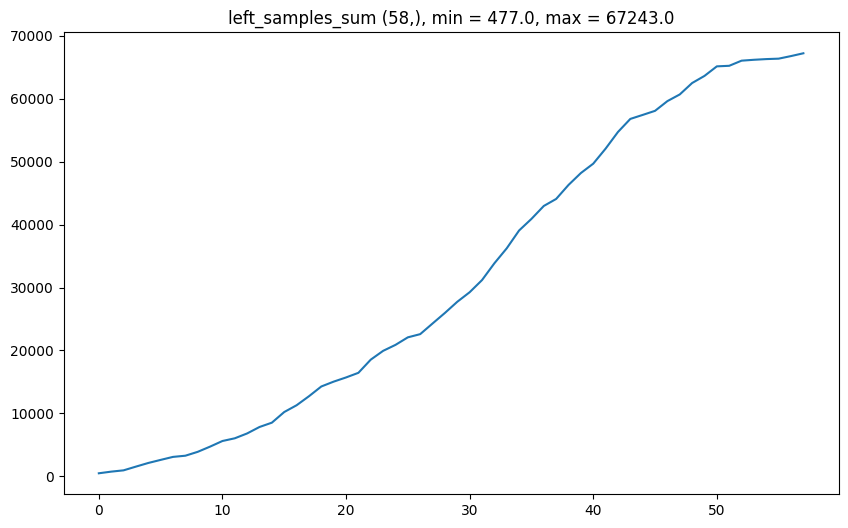

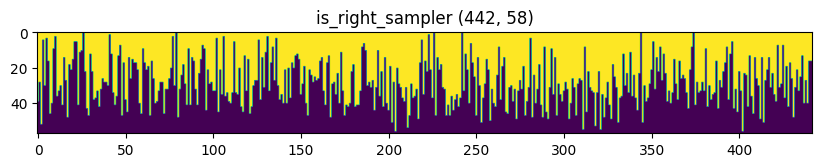

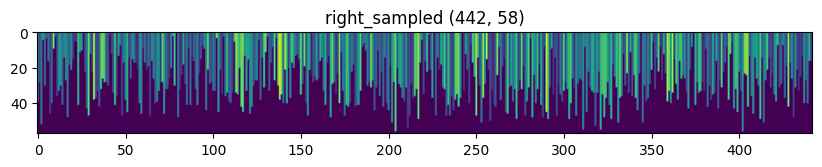

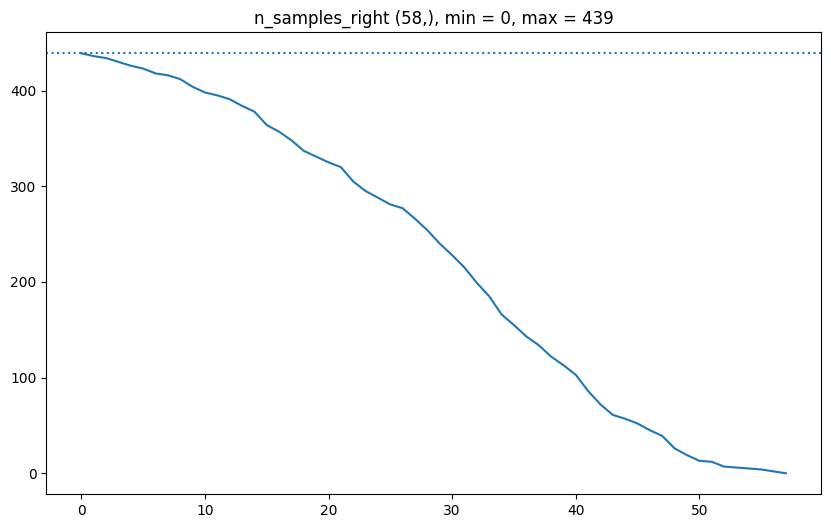

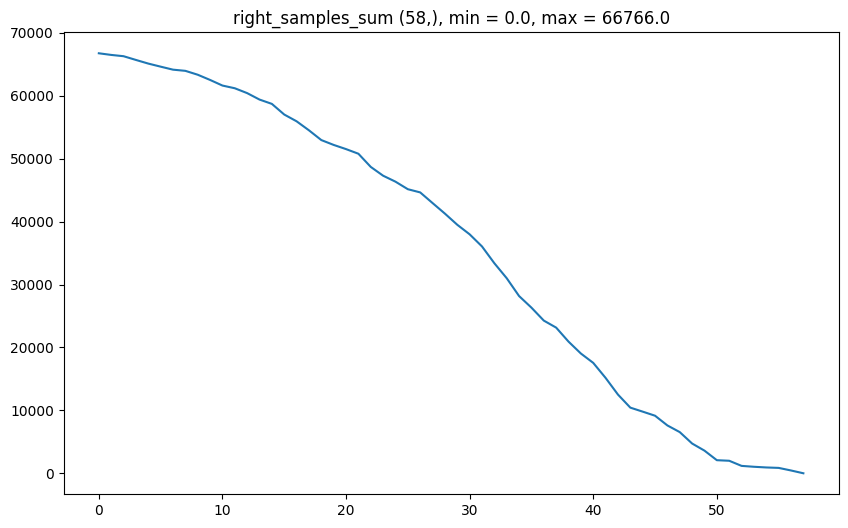

In [74]:
thresh = np.unique(X[:,0]).reshape(1,-1)
selected_feat = X[:,0].reshape(-1,1)
is_left_sampler = (selected_feat <= thresh)
is_right_sampler = ~(is_left_sampler)
stacked_targets = np.hstack([y.reshape(-1,1)] * is_left_sampler.shape[1])
left_sampled = is_left_sampler * stacked_targets
right_sampled = is_right_sampler * stacked_targets

n_samples_left = np.sum(is_left_sampler, axis=0)
n_samples_right = np.sum(is_right_sampler, axis=0)

left_samples_sum = np.sum(left_sampled, axis=0)
right_samples_sum = np.sum(right_sampled, axis=0)

left_samples_mean = np.where(n_samples_left == 0, 0, left_samples_sum / n_samples_left)
right_samples_mean = np.where(n_samples_right == 0, 0, right_samples_sum / n_samples_right)

# Plot for left
plt_figsize = (10,6)
plt.figure(figsize=plt_figsize)
plt.imshow(is_left_sampler.T)
plt.title(f'is_left_sampler {is_left_sampler.shape}')
plt.show()

plt_figsize = (10,6)
plt.figure(figsize=plt_figsize)
plt.imshow(left_sampled.T)
plt.title(f'left_sampled {left_sampled.shape}')
plt.show()

plt_figsize = (10,6)
plt.figure(figsize=plt_figsize)
plt.plot(np.arange(n_samples_left.shape[0]), n_samples_left)
plt.axhline(np.max(n_samples_left), linestyle='dotted')
plt.title(f'n_left {n_samples_left.shape}, min = {np.min(n_samples_left)}, max = {np.max(n_samples_left)}')
plt.show()

plt_figsize = (10,6)
plt.figure(figsize=plt_figsize)
plt.plot(np.arange(left_samples_sum.shape[0]), left_samples_sum)
plt.title(f'left_samples_sum {left_samples_sum.shape}, min = {np.min(left_samples_sum)}, max = {np.max(left_samples_sum)}')
plt.show()

# Plot for right
plt_figsize = (10,6)
plt.figure(figsize=plt_figsize)
plt.imshow(is_right_sampler.T)
plt.title(f'is_right_sampler {is_right_sampler.shape}')
plt.show()

plt_figsize = (10,6)
plt.figure(figsize=plt_figsize)
plt.imshow(right_sampled.T)
plt.title(f'right_sampled {right_sampled.shape}')
plt.show()

plt_figsize = (10,6)
plt.figure(figsize=plt_figsize)
plt.plot(np.arange(n_samples_right.shape[0]), n_samples_right)
plt.axhline(np.max(n_samples_right), linestyle='dotted')
plt.title(f'n_samples_right {n_samples_right.shape}, min = {np.min(n_samples_right)}, max = {np.max(n_samples_right)}')
plt.show()

plt_figsize = (10,6)
plt.figure(figsize=plt_figsize)
plt.plot(np.arange(right_samples_sum.shape[0]), right_samples_sum)
plt.title(f'right_samples_sum {right_samples_sum.shape}, min = {np.min(right_samples_sum)}, max = {np.max(right_samples_sum)}')
plt.show()


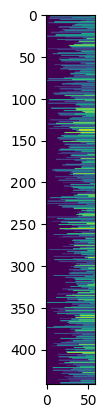

In [35]:
plt.imshow(left_sampled)
plt.show()

/var/folders/1j/chhd52wn0z97rq9skbstg0_00000gn/T/ipykernel_3156/2474144985.py:10: RuntimeWarning: invalid value encountered in divide
  var_right = np.where(n_samples_right == 0, 0, np.sum(var_right, axis=0) / n_samples_right)


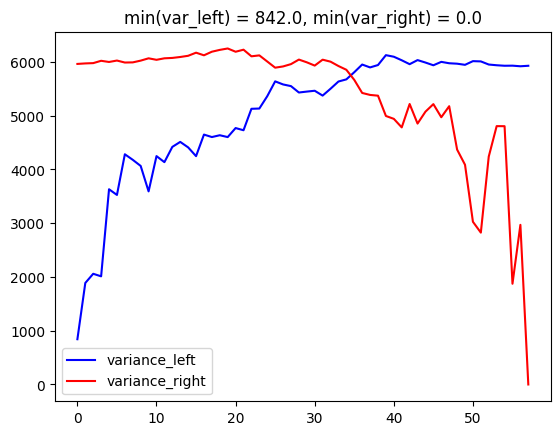

In [36]:
# Variance calculations
var_left = (left_sampled - left_samples_mean.reshape(1,-1)) ** 2
var_right = (right_sampled - right_samples_mean.reshape(1,-1)) ** 2

var_left = np.where(left_sampled == 0, 0, var_left)
var_right = np.where(right_sampled == 0, 0, var_right)

# var_left.shape
var_left = np.where(n_samples_left == 0, 0, np.sum(var_left, axis=0) / n_samples_left)
var_right = np.where(n_samples_right == 0, 0, np.sum(var_right, axis=0) / n_samples_right)

min_var_left = np.min(var_left)
min_var_right = np.min(var_right)
min_var_left = round(float(min_var_left), 2)
min_var_right = round(float(min_var_right), 2)


# var_left.shape

plt_figsize = (10,6)
plt.figure(figsize=plt_figsize)
plt.plot(np.arange(var_left.shape[0]), var_left, color='blue', label='variance_left')
plt.plot(np.arange(var_right.shape[0]), var_right, color='red', label='variance_right')
plt.legend()
plt.title(f'min(var_left) = {min_var_left}, min(var_right) = {min_var_right}')
plt.show()

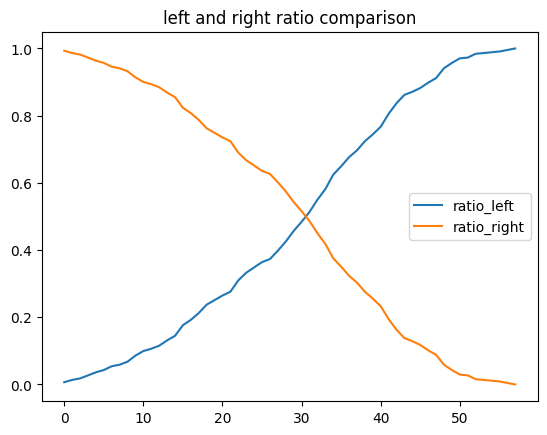

In [56]:
total_samples = left_sampled.shape[0]
assert total_samples == right_sampled.shape[0], 'wrong total samples'

ratio_left = n_samples_left / total_samples
ratio_right = n_samples_right / total_samples

plt_figsize = (10,6)
plt.figure(figsize=plt_figsize)
plt.plot(np.arange(ratio_left.shape[0]), ratio_left, label='ratio_left')
plt.plot(np.arange(ratio_right.shape[0]), ratio_right, label='ratio_right')
plt.legend()
plt.title('left and right ratio comparison')
plt.show()

In [43]:
print('var_left.shape = ', var_left.shape)
print('ratio_left.shape = ', ratio_left.shape)

print('var_right.shape = ', var_right.shape)
print('ratio_right.shape = ', ratio_right.shape)

var_left.shape =  (58,)
ratio_left.shape =  (58,)
var_right.shape =  (58,)
ratio_right.shape =  (58,)


In [62]:
thresh.shape

(1, 58)

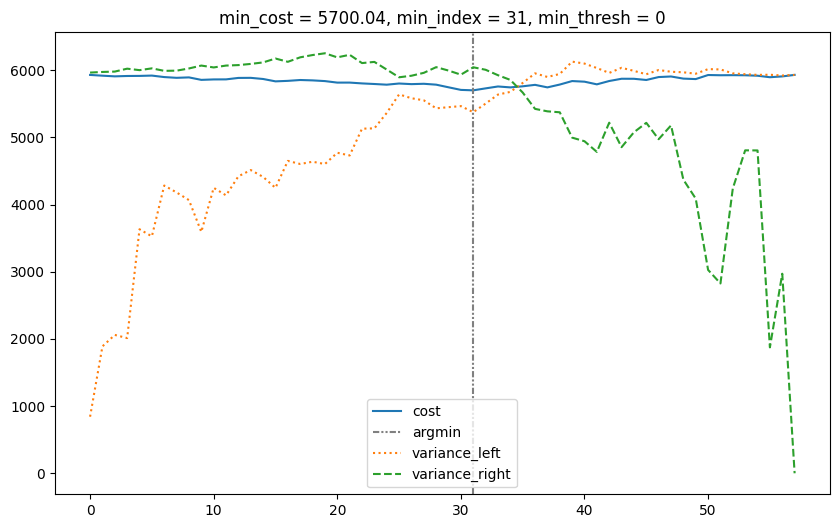

In [68]:
### This is what we want to minimize
thresh_cost = ratio_left * var_left + ratio_right * var_right
min_index = np.argmin(thresh_cost)

min_cost = np.min(thresh_cost)
min_cost = float(min_cost)
min_cost = round(min_cost, 2)

min_thresh = thresh.reshape(-1)[min_index]
min_thresh = float(min_thresh)
min_thresh = round(min_thresh)  


plt_figsize = (10,6)
plt.figure(figsize=plt_figsize)
plt.plot(np.arange(thresh_cost.shape[0]), thresh_cost, label='cost')
plt.axvline(min_index, color='gray', label='argmin', linestyle=(0, (3, 1, 1, 1, 1, 1)))
plt.plot(np.arange(var_left.shape[0]), var_left, label='variance_left', linestyle='dotted')
plt.plot(np.arange(var_right.shape[0]), var_right, label='variance_right', linestyle='dashed')
plt.legend()
plt.title(f'min_cost = {min_cost}, min_index = {min_index}, min_thresh = {min_thresh}')
plt.show()

In [2]:
# Create a function that returns left and right indicators
